<a href="https://colab.research.google.com/github/harshbaranwal2002/Exploratory-data-Analysis/blob/main/Brazil_forest_fire_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/amazon.csv', encoding='ISO-8859-1')

In [3]:
print(data.head())

   year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01


In [4]:
data.dtypes

,0
year,int64
state,object
month,object
number,float64
date,object


In [5]:
print(data.dtypes)

year        int64
state      object
month      object
number    float64
date       object
dtype: object


In [6]:
data['date']=pd.to_datetime(data['date'])

In [7]:
print(data.dtypes)

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object


In [8]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [9]:

data.shape

(6454, 5)

In [10]:
print("Number of rows",data.shape[0])
print("Number of coloumns",data.shape[1])

Number of rows 6454
Number of coloumns 5


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [12]:
dup_data=data.duplicated().any()
print(dup_data)

True


In [13]:
data=data.drop_duplicates()

In [14]:
data.shape

(6422, 5)

In [15]:
data.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


In [16]:
data.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [17]:
data['date'] = pd.to_datetime(data['date'])

In [18]:
data['date_numeric'] = data['date'].astype('int64')


In [19]:
print(data.describe(include='all'))

               year state     month       number  \
count   6422.000000  6422      6422  6422.000000   
unique          NaN    23        12          NaN   
top             NaN   Rio  Setembro          NaN   
freq            NaN   697       540          NaN   
mean    2007.490969   NaN       NaN   108.815178   
min     1998.000000   NaN       NaN     0.000000   
25%     2003.000000   NaN       NaN     3.000000   
50%     2007.000000   NaN       NaN    24.497000   
75%     2012.000000   NaN       NaN   114.000000   
max     2017.000000   NaN       NaN   998.000000   
std        5.731806   NaN       NaN   191.142482   

                                 date  date_numeric  
count                            6422  6.422000e+03  
unique                            NaN           NaN  
top                               NaN           NaN  
freq                              NaN           NaN  
mean    2007-06-29 10:46:40.622859008  1.183114e+18  
min               1998-01-01 00:00:00  8.836128e+17

In [20]:
data.shape

(6422, 6)

In [21]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'date_numeric'], dtype='object')

In [ ]:
data.columns

In [22]:
data1 = data.groupby('month')['number'].sum().reset_index()
print(data1)

        month     number
0       Abril  28184.770
1      Agosto  88050.435
2    Dezembro  57535.480
3   Fevereiro  30839.050
4     Janeiro  47681.844
5       Julho  92319.113
6       Junho  55997.675
7        Maio  34725.363
8       Março  30709.405
9    Novembro  85508.054
10    Outubro  88681.579
11   Setembro  58578.305


In [23]:
print(data1.columns)

Index(['month', 'number'], dtype='object')


In [27]:
if 'month_new' not in data1.columns:
    data1['month_new'] = data1['month']

In [39]:
# Please make sure to run the cell above this one first.
data1 = data1.groupby("month_new")["number"].sum().reset_index()
# sns.barplot(x="month_new", y="number", data=data1)

In [40]:
data['month_new'] = data['month'].map({'Janeiro':'jan','Fevereiro':'Feb', 'Marco':'March', 'Abril':'April', 'Maio':'May', 'Junho':'June', 'Julho':'July','Agosto':'Aug','Septembro':'Sep','Outubro':'Oct','Novembro':'Nov','Dezembro':'Dec'})

<Axes: xlabel='month_new', ylabel='number'>

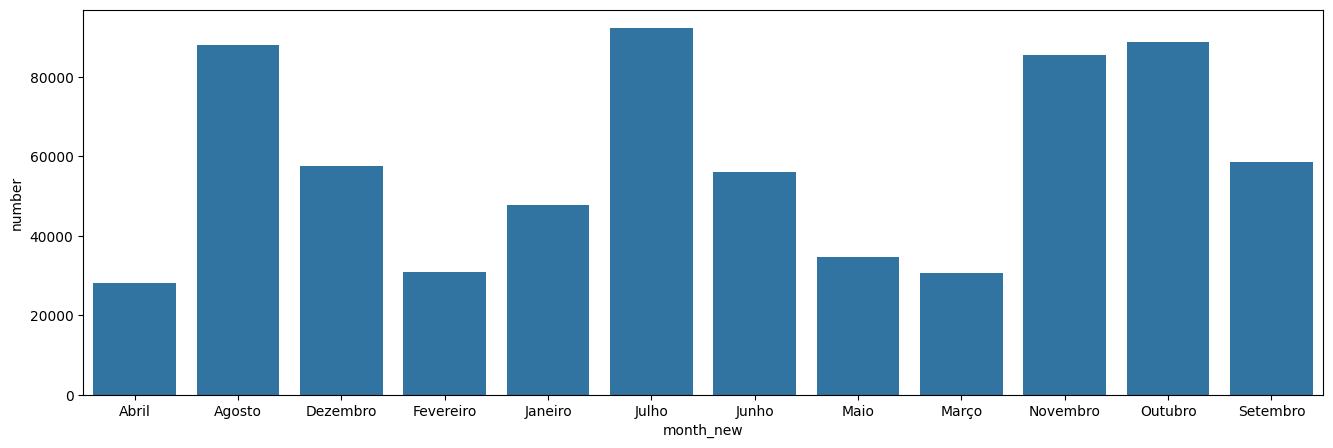

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new", y="number", data=data1)

In [42]:
data2 = data.groupby('year')['number'].sum().reset_index()
print(data1)

    month_new     number
0       Abril  28184.770
1      Agosto  88050.435
2    Dezembro  57535.480
3   Fevereiro  30839.050
4     Janeiro  47681.844
5       Julho  92319.113
6       Junho  55997.675
7        Maio  34725.363
8       Março  30709.405
9    Novembro  85508.054
10    Outubro  88681.579
11   Setembro  58578.305


<Axes: xlabel='year', ylabel='number'>

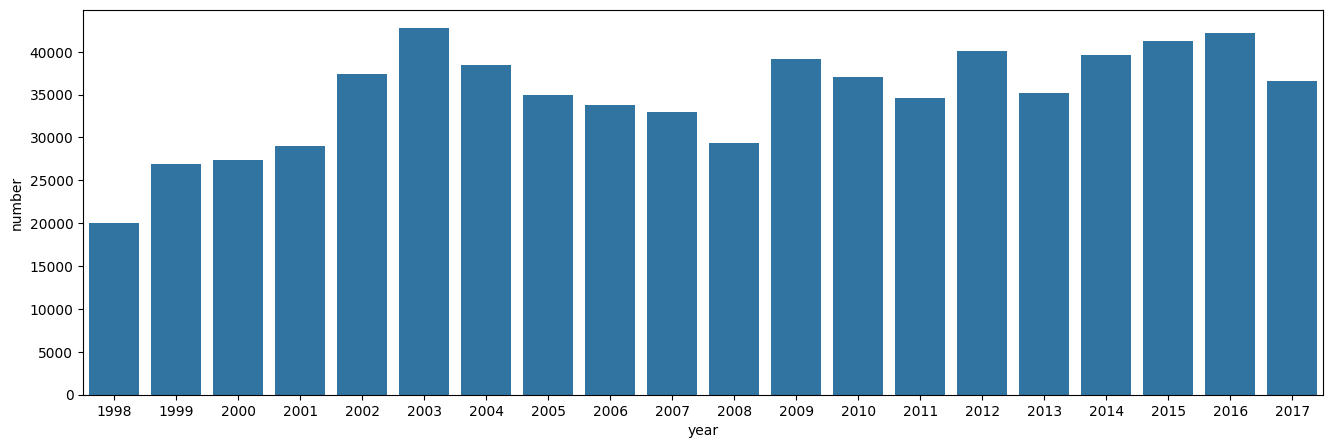

In [43]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data2)

In [44]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'date_numeric',
       'month_new'],
      dtype='object')

In [45]:
data3=data.groupby('state')['number'].sum().reset_index()

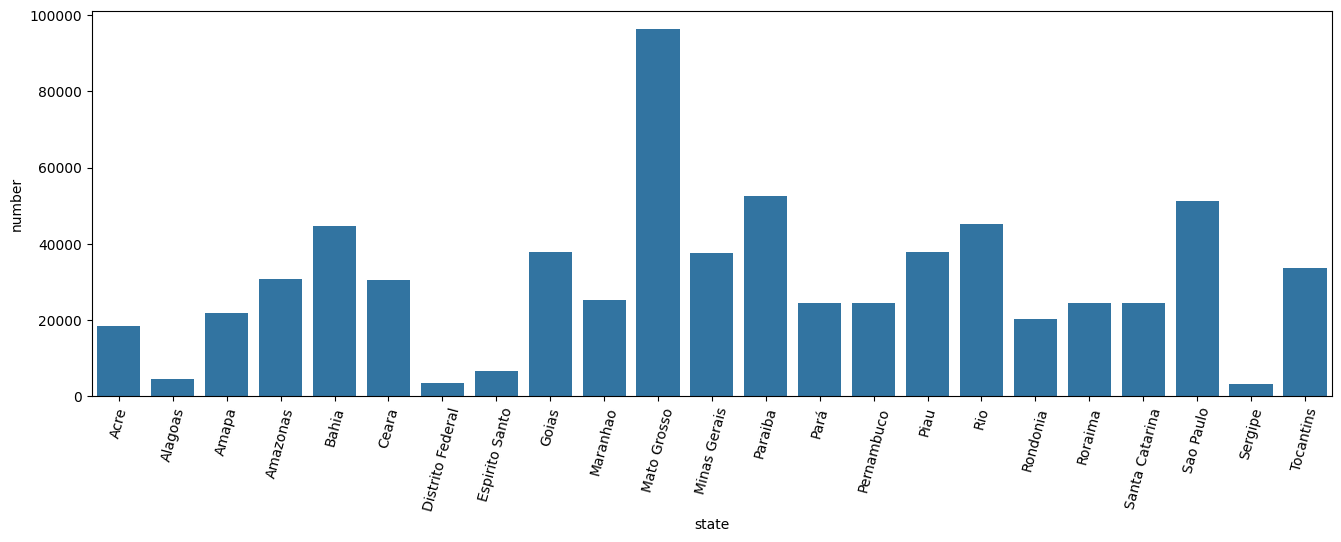

In [46]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data3)
plt.xticks(rotation=75)
plt.show()

In [47]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'date_numeric',
       'month_new'],
      dtype='object')

In [48]:
data[data['state']=='Amazonas']['number'].sum()

np.float64(30650.129)

In [49]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'date_numeric',
       'month_new'],
      dtype='object')

In [50]:
data4=data[data['state']=='Amazonas']
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

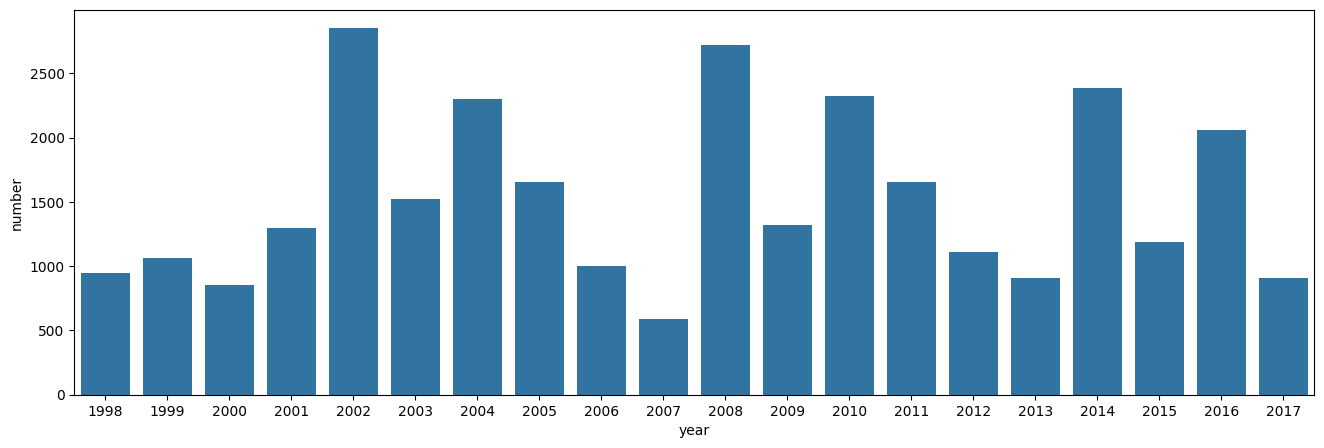

In [51]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data5)

In [52]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'date_numeric',
       'month_new'],
      dtype='object')

In [53]:
data6=data[data['state']=='Amazonas']

In [54]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'date_numeric',
       'month_new'],
      dtype='object')

In [55]:
fire=data[data['year']==2015].groupby('month_new')['number'].sum().reset_index()
fire

,month_new,number
0,April,2573.000
1,Aug,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,July,4364.392
5,June,3260.552
6,May,2384.000
7,Nov,4034.518
8,Oct,4499.525
9,jan,4635.000


<Axes: xlabel='month_new', ylabel='number'>

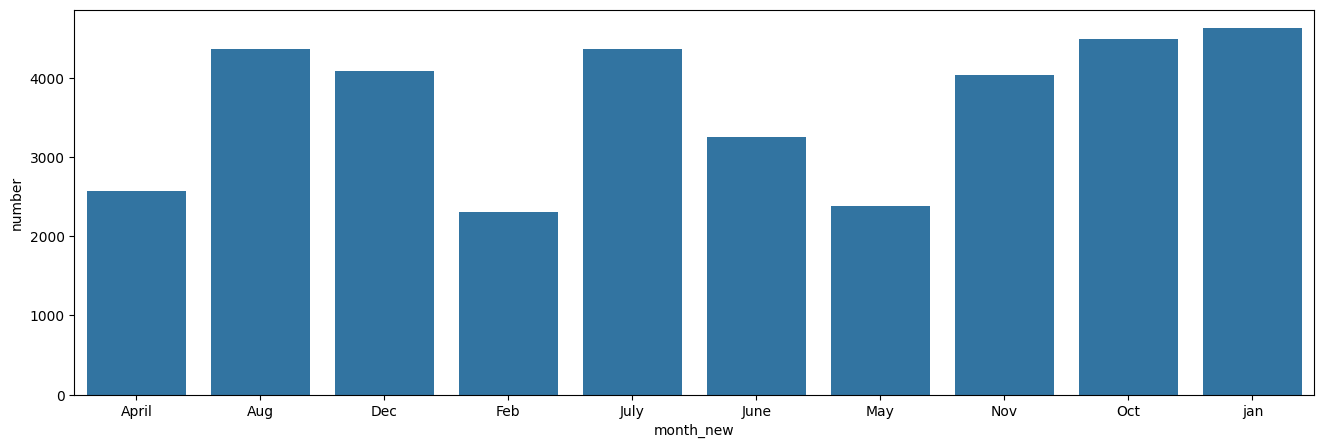

In [56]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=fire)

In [58]:
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'date_numeric',
       'month_new'],
      dtype='object')

In [59]:
data8=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


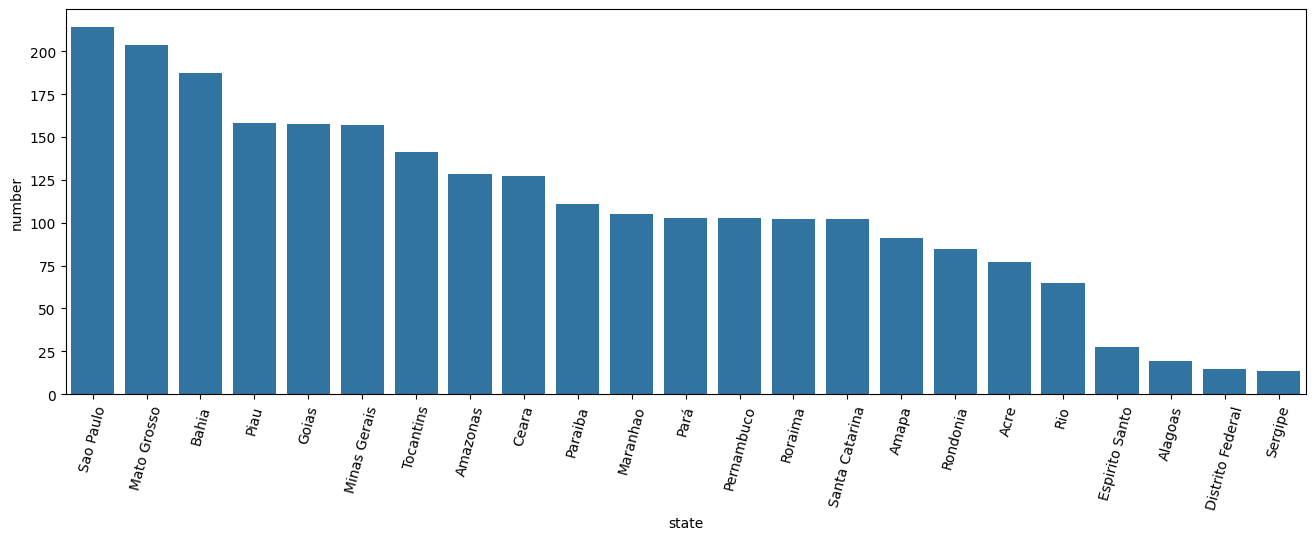

In [61]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data8)
plt.xticks(rotation=75)
plt.show()

In [62]:
data[data['month_new']=="Dec"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)